<a href="https://colab.research.google.com/github/Czyundream/Leetcodetest/blob/main/%E8%AF%AF%E5%B7%AE%E8%A1%A5%E5%81%BF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#补偿算法实现

In [ ]:
#导入常用库
!pip install git+https://github.com/d2l-ai/d2l-zh@release  # installing d2l


In [ ]:
import numpy as np
import torch
from torch.utils import data
from d2l import torch as d2l

In [ ]:
import pandas as pd

In [ ]:
#读取文件
!pip install -u -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

downloaded = drive.CreateFile({'id':'1C2cnS5fi2Du6UcCbShpj1W2AaFD49huD'})
downloaded.GetContentFile('250HZ.xlsx')


In [ ]:
def xlsx_to_csv():
    data_xls=pd.read_excel('250HZ.xlsx')
    data_xls.to_csv('250HZ.csv',encoding='utf-8')

xlsx_to_csv()

In [ ]:
data = pd.read_csv('250HZ.csv')
print(data)

In [ ]:
inputs , outputs= data.iloc[477: 1909, 2 : 4] , data.iloc[477 : 1909, 1]
features, labels = torch.tensor(inputs.values), torch.tensor(outputs.values)
features

In [ ]:
#获取最小误差处的索引
min_index = torch.argmin(torch.abs(features[:, 1]))
min_index

tensor(1271)

In [ ]:
wu = data.iloc[477: 1909, 4]
wu = torch.tensor(wu.values)

In [ ]:
features[:, 1].detach().numpy()

array([17.44875 , 17.366249, 17.16    , ..., 17.2425  , 17.283751,
       17.16    ])

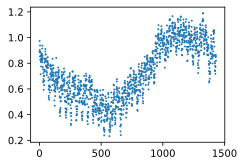

In [ ]:
i = range(len(features[:, 1]))
w = range(len(wu))
d2l.set_figsize()
#d2l.plt.scatter(features[:, 0].detach().numpy(), labels.detach().numpy(), 1);
#d2l.plt.scatter(features[:, 1].detach().numpy(), wu.detach().numpy(), 1);
#d2l.plt.plot(i, features[:, 1].detach().numpy());
d2l.plt.scatter(w, wu.detach().numpy(), 1);

In [ ]:
bc = torch.randn_like(wu)
#for i in range(len(bc)):
#    bc[i] = features[]
bc = features[:, 1]/wu
bc

tensor([19.6326, 17.8433, 18.9831,  ..., 20.2866, 19.9952, 20.9305],
       dtype=torch.float64)

In [ ]:
def findt(T, features):
    x = 0
    y = 100
    W = features[:, 1]
    for i in range(len(W)):
        if W[i]-T == 0:
            x = i
            return x
        elif y <= abs(W[i]-T):
            continue
        elif y > abs(W[i]-T):
            x = i
            y = abs(W[i]-T)
    return x

In [ ]:
def op(x, T, features):
    if x > 2:
        i = (bc[x-1]+ 12*bc[x] + bc[x+1])/14
    else:
        i = (12*bc[x] + bc[x+1] + bc[x+2])/14
    return T/i

In [ ]:
test_indata, test_outdata = data.iloc[0: 477, 2 : 4] , data.iloc[0 : 477, 1]
test_indata, test_outdata = torch.tensor(test_indata.values), torch.tensor(test_outdata.values)
m = test_indata[:, 1]
n = test_indata[:, 0]
new_n = torch.zeros_like(n)
for i in range(len(test_indata[:, 1])):
    x = findt(m[i], features)
    b = op(x, m[i], features)
    new_n[i] = n[i] - b

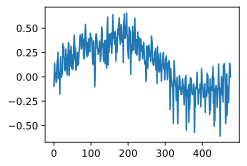

In [ ]:
error=test_outdata-new_n
i = range(len(error))
d2l.plt.plot(i, error);

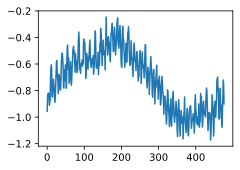

In [ ]:
real=test_outdata-n
d2l.plt.plot(i, real);

In [ ]:
features = torch.tensor(features, dtype=torch.float32)
labels = torch.tensor(labels, dtype=torch.float32)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  


#LSTM尝试
----


In [ ]:
#导入常用库
!pip install git+https://github.com/d2l-ai/d2l-zh@release  # installing d2l

In [2]:
import torch
from torch import nn
from d2l import torch as d2l
import pandas as pd
from torch.utils import data
#from torch.utils.data import TensorDataset,Dataset,DataLoader,random_split
import numpy as np

In [3]:
!pip install -u -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

downloaded = drive.CreateFile({'id':'1C2cnS5fi2Du6UcCbShpj1W2AaFD49huD'})
downloaded.GetContentFile('250HZ.xlsx')


Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: -u


In [4]:
def xlsx_to_csv():
    data_xls=pd.read_excel('250HZ.xlsx')
    data_xls.to_csv('250HZ.csv',encoding='utf-8')

xlsx_to_csv()

In [5]:
data1 = pd.read_csv('250HZ.csv')
print(data1)

      Unnamed: 0       光电           磁         温度        误差
0              0  358.375  359.331207  17.201250  0.956207
1              1  357.750  358.604736  17.242500  0.854736
2              2  357.000  357.823334  17.366249  0.823334
3              3  356.250  357.070068  17.325001  0.820068
4              4  355.500  356.318909  17.407499  0.818909
...          ...      ...         ...        ...       ...
1904        1904    1.125    1.896515  17.118750  0.771515
1905        1905    0.750    1.599884  17.283751  0.849884
1906        1906    0.500    1.349945  17.242500  0.849945
1907        1907    0.375    1.239395  17.283751  0.864395
1908        1908    0.000    0.819855  17.160000  0.819855

[1909 rows x 5 columns]


In [6]:
inputs , outputs= data1.iloc[0: 1909, 2 : 4] , data1.iloc[0 : 1909, 4]#477 
features, labels = torch.tensor(inputs.values), torch.tensor(outputs.values)
features

tensor([[359.3312,  17.2013],
        [358.6047,  17.2425],
        [357.8233,  17.3662],
        ...,
        [  1.3499,  17.2425],
        [  1.2394,  17.2838],
        [  0.8199,  17.1600]], dtype=torch.float64)

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
sca_X = scaler.fit_transform(features)
New_X = torch.from_numpy(sca_X)
New_X.shape

torch.Size([1909, 2])

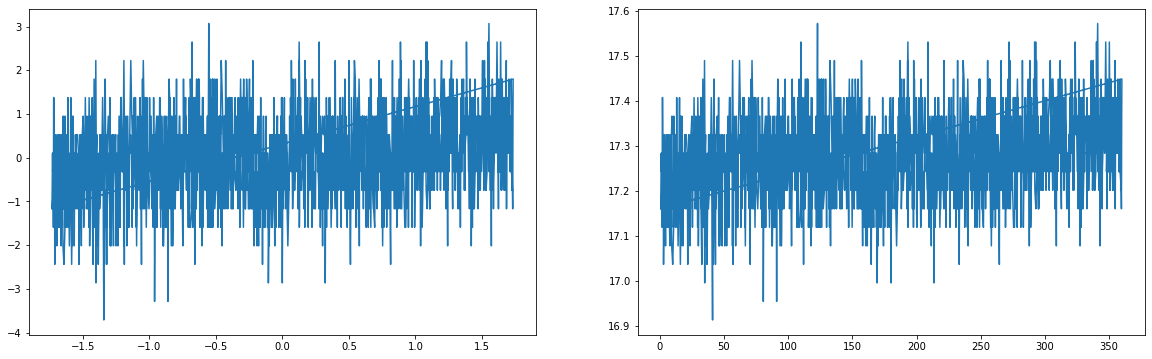

In [8]:
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,6))
ax1.plot(New_X[:, 0], New_X[:, 1])
ax2.plot(features[:, 0], features[:, 1])

In [40]:
def load_array(data_arrays, batch_size, is_train=True):
    '''构造一个PyTorch数据迭代器'''
    dataset = data.TensorDataset(*data_arrays)#将数据转为dataset，*表示将元组拆解为一维数字作为传入参数

    #拆分训练集与预测集
    num_train = int(len(dataset)*0.8)
    num_valid = len(dataset) - num_train
    ds_train,ds_valid = data.random_split(dataset,[num_train,num_valid])

    data_train_iter, data_valid_iter = data.DataLoader(ds_train, batch_size, shuffle=is_train), data.DataLoader(ds_valid, batch_size, shuffle=is_train)
    #return data.DataLoader(dataset, batch_size, shuffle=is_train)
    #将dataset型数据挑选batch_size大小的样本，shuffle控制是否打乱
    return data_train_iter, data_valid_iter

In [41]:
def LSTM_Data_precesing(pre_length, mem_data_time, features, labels):
    '''LSTM数据预处理函数，归一化与构造数据迭代器'''
    #归一化处理
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    sca_X = scaler.fit_transform(features)
    New_X = torch.from_numpy(sca_X)
    #print(New_X.shape)

    #构造特征向量X
    #mem_data_time = 5

    from collections import deque
    deq = deque(maxlen=mem_data_time)

    X=[]
    for i in sca_X:
        deq.append(list(i))
        if len(deq)==mem_data_time:
            X.append(list(deq))

    #构造特征向量y--labels
    y = labels[mem_data_time-1:]
    print(y.shape)

    #X = np.array(New_X) 
    X = np.array(X)
    #y = np.array(labels) 
    y = np.array(y)
    #print(X.shape)
    #print(y.shape)

    New_X = torch.from_numpy(X).to(torch.float32)
    New_y = torch.from_numpy(y).to(torch.float32)
    '''
    # 移动到GPU上
    print("torch.cuda.is_available() = ",torch.cuda.is_available())
    New_X = New_X.cuda()
    New_y = New_y.cuda()
    print("New_X.device:",New_X.device)
    print("New_y.device:",New_y.device)
    '''
    data_train_iter, data_valid_iter = load_array((New_X, New_y), pre_length)

    #next(iter(data_iter))
    return data_train_iter, data_valid_iter

In [ ]:
batch_size = 20
mem_data_time = 3
data_train_iter, data_valid_iter = LSTM_Data_precesing(batch_size, mem_data_time, features, labels)
next(iter(data_train_iter))
#data_train_iter = data_train_iter.cuda()
#data_valid_iter = data_valid_iter.cuda()

In [38]:
len(data_train_iter)

77

In [43]:
class LSTM(nn.Module):
    def __init__(self, num_feature, hidden_num, hidden_num2, bag_exm_num):
        super().__init__()
        
        self.num_feature = num_feature
        self.hidden_num = hidden_num
        self.hidden_num2 = hidden_num2
        self.bag_exm_num = bag_exm_num

        self.lstm = nn.LSTM(input_size = num_feature , hidden_size = hidden_num, batch_first = True, num_layers = 3, bidirectional = False)#不适用dropout
        self.lstm2 = nn.LSTM(input_size = 4 , hidden_size = hidden_num2, batch_first = True, num_layers = 3, bidirectional = False)
        self.dropout = nn.Dropout(0.1)
        self.flatten = nn.Flatten(1, 2)
        self.linear = nn.Linear(12, 1)
        self.relu = nn.ReLU()

        self.cross_entroy = nn.CrossEntropyLoss()
    
    def forward(self, X, h_0 = None, c_0 = None):
        if h_0 == None or c_0 == None:
            h_0_1 = torch.zeros([3, X.shape[0], self.hidden_num], dtype=torch.float32)#, device=X.device)
            c_0_1 = torch.zeros([3, X.shape[0], self.hidden_num], dtype=torch.float32)#device=X.device)
            #h_0_2 = torch.zeros([3, X.shape[0], self.hidden_num2], dtype=torch.float32)#, device=X.device)
            #c_0_2 = torch.zeros([3, X.shape[0], self.hidden_num2], dtype=torch.float32)#device=X.device)
        #第一层
        hidden1,(h, c) = self.lstm(X,(h_0_1,c_0_1))
        #print("hidden1的shape",hidden1.shape)
        out1_relu = self.relu(hidden1)
        hidden1_drop = self.dropout(out1_relu)
        #print("hidden1_Drop的shape",hidden1_drop.shape)

        #第二层
        hidden2,(h2, c2) = self.lstm2(hidden1_drop, (h, c))
        out2_relu = self.relu(hidden2)
        #hidden2_drop = self.dropout(out2_relu)

        #输出层
        flatten_hidden = self.flatten(out2_relu)
        #print("flatten_hidden的shape",flatten_hidden.shape)
        pre = self.linear(flatten_hidden)
        #print(pre.shape)
        return pre,(h, c)

In [ ]:
def mspe(y_pred,y_true):
    err_percent = (y_true - y_pred)**2/(torch.max(y_true**2,torch.tensor(1e-7)))
    return torch.mean(err_percent)

In [ ]:
num_feature = 2
hidden_num = 12
hidden_num2 = 4
lr = 0.1
num_epochs = 100

net = LSTM(num_feature, hidden_num, hidden_num2, batch_size)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
net.to(device)

#查看模型是否已经移动到GPU上
print("if on cuda:",next(net.parameters()).is_cuda)

if on cuda: False


In [75]:
#训练

num_feature = 2
hidden_num = 4
hidden_num2 = 4
lr = 0.3
num_epochs = 100

net = LSTM(num_feature, hidden_num, hidden_num2, batch_size)

#net = net(num_feature, hidden_num, batch_size)
optimizer = torch.optim.AdamW(net.parameters(), lr = lr)
#optimizer = torch.optim.Adagrad(net.parameters(),lr = lr)
#optimizer = torch.optim.Adam(net.parameters(),lr = lr)
loss = nn.SmoothL1Loss()
l_sum=0.0
i=0
epoch_loss = []
step_loss = []
for epoch in range(num_epochs):
    for x_train, y_train in data_train_iter:

        #y_train = y_train.float()
        pre,(h, c) = net(x_train)
        #print("pre的shape",pre.shape)
        #pre = pre.float()
        l = loss(pre, y_train)
        i+=1
        l_sum+=l
        optimizer.zero_grad()
        l.backward()
        optimizer.step()
        l_value = l.detach().numpy()
        step_loss.append(l_value) 
    epoch_loss.append(list(step_loss))
    step_loss.clear()
    '''
    if (epoch+1) % 5 == 0:
        print(f'epoch{epoch+1}, loss{l_sum/i:f}')#l:f打印l，格式为浮点数
        print(f'epoch_item{epoch+1}, loss{l:f}')
        l_sum = 0.0
        i=0
    '''



/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:912: UserWarning: Using a target size (torch.Size([20])) that is different to the input size (torch.Size([20, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.smooth_l1_loss(input, target, reduction=self.reduction, beta=self.beta)
/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:912: UserWarning: Using a target size (torch.Size([5])) that is different to the input size (torch.Size([5, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.smooth_l1_loss(input, target, reduction=self.reduction, beta=self.beta)


In [77]:
import matplotlib.pyplot as plt
epoch_loss = np.array(epoch_loss)
print(epoch_loss.shape)

(100, 77)


In [ ]:
#训练
num_feature = 2
hidden_num = 4
hidden_num2 = 4
lr = 0.3
num_epochs = 100

net = LSTM(num_feature, hidden_num, hidden_num2, batch_size)

#net = net(num_feature, hidden_num, batch_size)
optimizer = torch.optim.AdamW(net.parameters(), lr = lr)
#optimizer = torch.optim.Adagrad(net.parameters(),lr = lr)
#optimizer = torch.optim.Adam(net.parameters(),lr = lr)
loss = nn.SmoothL1Loss()
l_sum=0.0
i=0
step_loss = []
for x_train, y_train in data_train_iter:

    #y_train = y_train.float()
    pre,(h, c) = net(x_train)
    #print("pre的shape",pre.shape)
    #pre = pre.float()
    l = loss(pre, y_train)
    i+=1
    l_sum+=l
    optimizer.zero_grad()
    l.backward()
    optimizer.step()
    step_loss.append(l.detach().numpy())
print(step_loss)

77

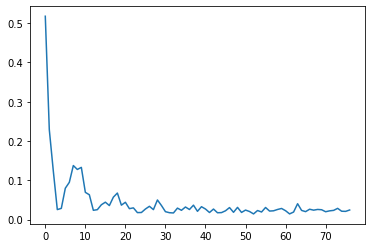

In [64]:
import matplotlib.pyplot as plt
i=range(len(step_loss))
plt.plot(i, step_loss)

len(step_loss)

In [ ]:
 #训练

num_feature = 2
hidden_num = 4
hidden_num2 = 4
lr = 0.3
num_epochs = 100

net = LSTM(num_feature, hidden_num, hidden_num2, batch_size)

#net = net(num_feature, hidden_num, batch_size)
optimizer = torch.optim.AdamW(net.parameters(), lr = lr)
#optimizer = torch.optim.Adagrad(net.parameters(),lr = lr)
#optimizer = torch.optim.Adam(net.parameters(),lr = lr)
loss = nn.SmoothL1Loss()
l_sum=0.0
i=0
for epoch in range(num_epochs):
    net.train()
    for x_train, y_train in data_train_iter:

        #y_train = y_train.float()
        pre,(h, c) = net(x_train)
        #print("pre的shape",pre.shape)
        #pre = pre.float()
        l = loss(pre, y_train)
        i+=1
        l_sum+=l
        optimizer.zero_grad()
        l.backward()
        optimizer.step()
    if (epoch+1) % 5 == 0:
        print(f'epoch{epoch+1}, loss{l_sum/i:f}')#l:f打印l，格式为浮点数
        print(f'epoch_item{epoch+1}, loss{l:f}')
        l_sum = 0.0
        i=0
    # 验证
    net.eval()
    val_loss_sum = 0.0
    val_metric_sum = 0.0
    val_step = 1

    for val_step, (features,labels) in enumerate(data_valid_iter, 1):
        with torch.no_grad():
            predictions,(h, c) = net(features)
            val_loss = loss(predictions,labels)
            #val_metric = metric_func(predictions,labels)

        val_loss_sum += val_loss.item()
        #val_metric_sum += val_metric.item()
    info = (epoch, l_sum/i, 
            val_loss_sum/val_step)
    #if epoch%5 == 0:
    # 打印epoch级别日志
    print(("\nEPOCH = %d, loss = %.3f, val_loss = %.3f") 
            %info)

NameError: ignored

In [ ]:
print(next(net.parameters()).is_cuda)
net.to("cuda:0") # 将模型中的全部参数张量依次到GPU上，注意，无需重新赋值为 net = net.to("cuda:0")
print(next(net.parameters()).is_cuda)
print(next(net.parameters()).device)

True
True
cuda:0


In [ ]:
print(net)

LSTM(
  (lstm): LSTM(2, 4, num_layers=2, batch_first=True)
  (lstm2): LSTM(4, 2, num_layers=2, batch_first=True)
  (dropout): Dropout(p=0.2, inplace=False)
  (flatten): Flatten(start_dim=1, end_dim=2)
  (linear): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
  (cross_entroy): CrossEntropyLoss()
)


In [ ]:
import datetime
import numpy as np 
import pandas as pd 
from sklearn.metrics import accuracy_score

'''
def accuracy(y_pred,y_true):
    y_pred_cls = torch.argmax(nn.Softmax(dim=1)(y_pred),dim=1).data
    return accuracy_score(y_true,y_pred_cls)
'''


loss_func = nn.MSELoss()
#optimizer = torch.optim.AdamW(params=net.parameters(),lr = 0.01)
optimizer = torch.optim.AdamW(net.parameters(), lr = 0.01)
#metric_func = accuracy
#metric_name = "accuracy"

log_step_freq = 30
log_epoch_freq = 10
epoch_loss=0.0
num_feature = 2
hidden_num = 4
hidden_num2 = 2
lr = 0.1
num_epochs = 100


net = LSTM(num_feature, hidden_num, hidden_num2, batch_size)

#dfhistory = pd.DataFrame(columns = ["epoch","loss","val_loss"]) 
print("Start Training...")
#nowtime = datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')
#print("=========="*8 + "%s"%nowtime)

for epoch in range(1,num_epochs+1):  

    # 1，训练循环-------------------------------------------------
    net.train()
    loss_sum = 0.0
    metric_sum = 0.0
    step = 1

    for step, (x_train,y_train) in enumerate(data_train_iter, 1):

        # 正向传播求损失
        predictions,(h, c) = net(x_train)
        loss = loss_func(predictions, y_train)
        #metric = metric_func(predictions,y_train)
        
        # 梯度清零
        optimizer.zero_grad()
        
        # 反向传播求梯度
        loss.backward()
        optimizer.step()

        # 打印batch级别日志
        loss_sum += loss.item()
        #metric_sum += metric.item()
        '''
        if step%log_step_freq == 0:   
            print(("[step = %d] loss: %.3f") %
                  (step, loss_sum/step))
        '''
    # 记录日志-------------------------------------------------
    epoch_loss+=(loss_sum/step)
    #info = (epoch, epoch_loss/log_epoch_freq)
    #dfhistory.loc[epoch-1] = info

    # 打印epoch级别日志
    if epoch%log_epoch_freq == 0:   
        print(epoch_loss, log_epoch_freq, epoch_loss/log_epoch_freq)
        print(("\nEPOCH = %d, loss = %.3f") 
                %(epoch, epoch_loss/log_epoch_freq))
        epoch_loss = 0.0
        #nowtime = datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')
        #print("\n"+"=========="*8 + "%s"%nowtime)

'''
    # 2，验证循环-------------------------------------------------
    net.eval()
    val_loss_sum = 0.0
    val_metric_sum = 0.0
    val_step = 1

    for val_step, (features,labels) in enumerate(data_valid_iter, 1):
        with torch.no_grad():
            predictions,(h, c) = net(features)
            val_loss = loss_func(predictions,labels)
            #val_metric = metric_func(predictions,labels)

        val_loss_sum += val_loss.item()
        #val_metric_sum += val_metric.item()

    # 3，记录日志-------------------------------------------------
    info = (epoch, loss_sum/step, 
            val_loss_sum/val_step)
    dfhistory.loc[epoch-1] = info
    #if epoch%5 == 0:
    # 打印epoch级别日志
    print(("\nEPOCH = %d, loss = %.3f, val_loss = %.3f") 
            %info)
    nowtime = datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')
    print("\n"+"=========="*8 + "%s"%nowtime)
'''
print('Finished Training...')

NameError: ignored

#SVM

In [ ]:
#导入常用库
!pip install git+https://github.com/d2l-ai/d2l-zh@release  # installing d2l

In [ ]:
!pip install -U numpy

In [ ]:
import pandas as pd

In [ ]:
import pandas as pd
from torch.utils import data
#from torch.utils.data import TensorDataset,Dataset,DataLoader,random_split
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch import nn
from d2l import torch as d2l

ValueError: ignored

In [ ]:
!pip install -u -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

downloaded = drive.CreateFile({'id':'1C2cnS5fi2Du6UcCbShpj1W2AaFD49huD'})
downloaded.GetContentFile('250HZ.xlsx')


Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: -u


In [ ]:
def xlsx_to_csv():
    data_xls=pd.read_excel('250HZ.xlsx')
    data_xls.to_csv('250HZ.csv',encoding='utf-8')

xlsx_to_csv()

In [ ]:
data1 = pd.read_csv('250HZ.csv')
print(data1)

In [ ]:
inputs , outputs= data1.iloc[0: 1909, 2 : 4] , data1.iloc[0 : 1909, 4]#477 
features, labels = torch.tensor(inputs.values), torch.tensor(outputs.values)
features

NameError: ignored

In [ ]:
def load_array(data_arrays, batch_size, is_train=False):
    '''构造一个PyTorch数据迭代器'''
    dataset = data.TensorDataset(*data_arrays)#将数据转为dataset，*表示将元组拆解为一维数字作为传入参数

    #拆分训练集与预测集
    num_train = int(len(dataset)*0.8)
    num_valid = len(dataset) - num_train
    ds_train,ds_valid = data.random_split(dataset,[num_train,num_valid])

    data_train_iter, data_valid_iter = data.DataLoader(ds_train, batch_size, shuffle=is_train), data.DataLoader(ds_valid, batch_size, shuffle=is_train)
    #return data.DataLoader(dataset, batch_size, shuffle=is_train)
    #将dataset型数据挑选batch_size大小的样本，shuffle控制是否打乱
    return data_train_iter, data_valid_iter

In [ ]:
def LSTM_Data_precesing(pre_length, mem_data_time, features, labels):
    '''LSTM数据预处理函数，归一化与构造数据迭代器'''
    #归一化处理
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    sca_X = scaler.fit_transform(features)
    New_X = torch.from_numpy(sca_X)
    #print(New_X.shape)

    #构造特征向量X
    #mem_data_time = 5

    from collections import deque
    deq = deque(maxlen=mem_data_time)

    X=[]
    for i in sca_X:
        deq.append(list(i))
        if len(deq)==mem_data_time:
            X.append(list(deq))

    #构造特征向量y--labels
    y = labels[mem_data_time-1:]
    print(y.shape)

    #X = np.array(New_X) 
    X = np.array(X)
    #y = np.array(labels) 
    y = np.array(y)
    #print(X.shape)
    #print(y.shape)

    New_X = torch.from_numpy(X).to(torch.float32)
    New_y = torch.from_numpy(y).to(torch.float32)
    '''
    # 移动到GPU上
    print("torch.cuda.is_available() = ",torch.cuda.is_available())
    New_X = New_X.cuda()
    New_y = New_y.cuda()
    print("New_X.device:",New_X.device)
    print("New_y.device:",New_y.device)
    '''
    data_train_iter, data_valid_iter = load_array((New_X, New_y), pre_length)

    #next(iter(data_iter))
    return data_train_iter, data_valid_iter

In [ ]:
batch_size = 50
mem_data_time = 7
data_train_iter, data_valid_iter = LSTM_Data_precesing(batch_size, mem_data_time, features, labels)
next(iter(data_train_iter))

#另一设想
----

In [ ]:
def load_array(data_arrays, batch_size, is_train=True):
    '''构造一个PyTorch数据迭代器'''
    dataset = data.TensorDataset(*data_arrays)#将数据转为dataset，*表示将元组拆解为一维数字作为传入参数
    return data.DataLoader(dataset, batch_size, shuffle=is_train)
    #将dataset型数据挑选batch_size大小的样本，shuffle控制是否打乱

batch_size = 50
data_iter = load_array((features, labels), batch_size)

next(iter(data_iter))

[tensor([[[ 1.6305, -0.3204],
          [ 1.6289,  0.9513],
          [ 1.6253,  1.3753],
          [ 1.6239, -1.1683],
          [ 1.6223,  0.1035]]]), tensor([0.8916])]

In [ ]:
from torch import nn#nn为神经网络的缩写

net = nn.Sequential(nn.Linear(2, 1))#Linear为全连接层，需要指定输入维度和输出维度
#Sequential可以理解为容器，即list of layers

In [ ]:
net[0].weight.data.normal_(1, 0.01)#normal_为使用正态分布替换掉data的值
net[0].bias.data.fill_(0)#bias为偏差

tensor([0.])

In [ ]:
loss = nn.MSELoss()
trainer = torch.optim.SGD(net.parameters(), lr=0.003)#optim.SGD需要指定两个参数：net.parameters()为拿出所有参数，lr学习率

In [ ]:
num_epochs = 20
for epoch in range(num_epochs):
    for X, y in data_iter:
        l = loss(net(X), y)
        trainer.zero_grad()
        l.backward()
        trainer.step()
    l = loss(net(features), labels)
    print(f'epoch{epoch + 1}, loss{l:f}')#l:f打印l，格式为浮点数

epoch1, loss1.515235
epoch2, loss1.471963
epoch3, loss1.430363
epoch4, loss1.390363
epoch5, loss1.351896
epoch6, loss1.314896
epoch7, loss1.279301
epoch8, loss1.245052
epoch9, loss1.212092
epoch10, loss1.180366
epoch11, loss1.149823
epoch12, loss1.120413
epoch13, loss1.092087
epoch14, loss1.064801
epoch15, loss1.038512
epoch16, loss1.013175
epoch17, loss0.988754
epoch18, loss0.965209
epoch19, loss0.942504
epoch20, loss0.920603


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:520: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 5, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


#磁数据补偿
---
start

In [ ]:
import numpy as np
import torch
from torch.utils import data
#from d2l import torch as d2l
import pandas as pd

In [ ]:
!pip install -u -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

downloaded = drive.CreateFile({'id':'1vSjcohcF_sefqy_-_7grnnnhlv2VvB1o'})
downloaded.GetContentFile('data_ci.csv')

In [ ]:
data = pd.read_csv('data_ci.csv')
print(data)

In [ ]:
inputs1, outputs1 = data.iloc[:, 1], data.iloc[:, 2]
inputs1 = inputs1.dropna(how = 'any')
outputs1 = outputs1.dropna(how = 'any')
inputs1.shape, outputs1.shape

In [ ]:
features1, labels1 = torch.tensor(inputs1.values), torch.tensor(outputs1.values)

In [ ]:
i = np.arange(1, len(features1)+1)
d2l.set_figsize()
#d2l.plt.scatter(features[:, 0].detach().numpy(), labels.detach().numpy(), 1);
d2l.plt.scatter(i, features1.detach().numpy(), 1);

In [ ]:
d2l.set_figsize()
#d2l.plt.scatter(features[:, 0].detach().numpy(), labels.detach().numpy(), 1);
d2l.plt.scatter(i, labels1.detach().numpy(), 1);

In [ ]:
d2l.set_figsize()
#d2l.plt.scatter(features[:, 0].detach().numpy(), labels.detach().numpy(), 1);
d2l.plt.scatter(labels1.detach().numpy(), features1.detach().numpy(), 1);

In [ ]:
d2l.set_figsize()
d2l.plt.scatter(features1.detach().numpy(), labels1.detach().numpy(), 1);

In [ ]:
w = torch.ones_like(features1)